In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import stats
from scipy.stats import linregress
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
#Read data from csv into a dataframe
data = pd.read_csv("cpidata_5year.csv", parse_dates = ['date'])
data.tail()


,date,dairycpi,mpfecpi,fandvcpi
55,2024-08-01,269.468,328.340,350.960
56,2024-09-01,269.643,331.004,353.976
57,2024-10-01,271.695,326.927,355.415
58,2024-11-01,270.819,332.468,356.111
59,2024-12-01,271.358,334.525,355.730


In [3]:
data.columns = ["Date", "Dairy", "Meat", "Fruits & Vegetables"]
data.head()

,Date,Dairy,Meat,Fruits & Vegetables
0,2020-01-01,223.035,254.065,300.344
1,2020-02-01,224.443,254.880,298.851
2,2020-03-01,225.627,255.552,300.161
3,2020-04-01,228.755,265.915,303.084
4,2020-05-01,230.166,274.780,304.804


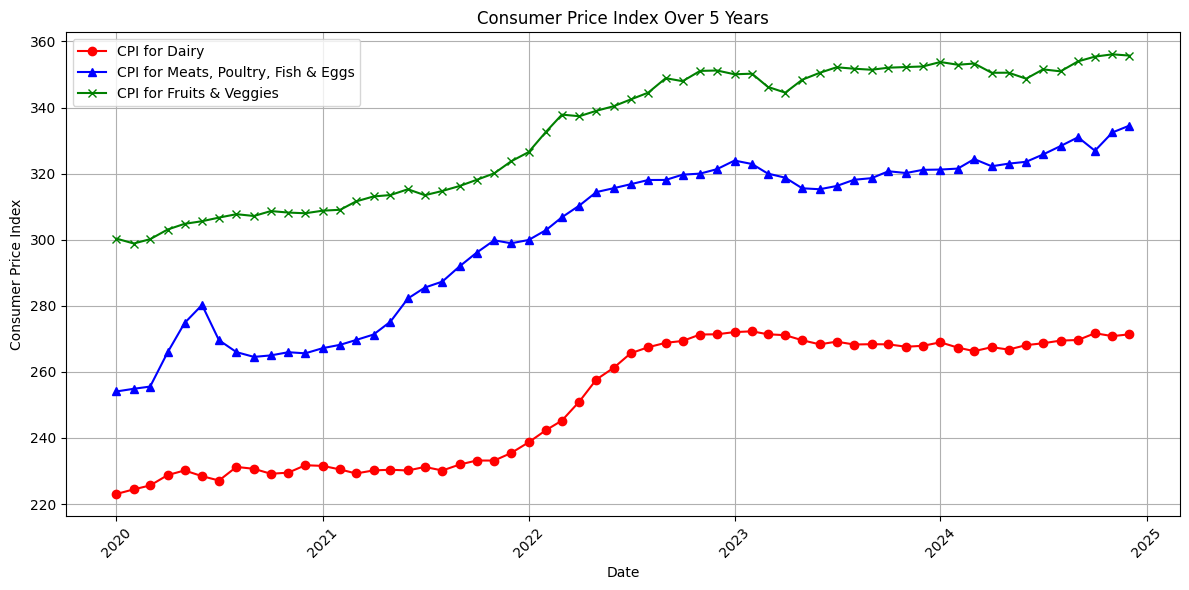

In [4]:
plt.figure(figsize=(12, 6))

plt.plot(data['Date'], data['Dairy'], label='CPI for Dairy', color='r', linestyle='-', marker='o')
plt.plot(data['Date'], data['Meat'], label='CPI for Meats, Poultry, Fish & Eggs', color='b', linestyle='-', marker='^')
plt.plot(data['Date'], data['Fruits & Vegetables'], label='CPI for Fruits & Veggies', color='g', linestyle='-', marker='x')

plt.title('Consumer Price Index Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Consumer Price Index')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.legend()
plt.savefig("CPI_Over_5_Years.png")

plt.show()


In [5]:
# Check correlation between each category (Is there a relationship between each category?)
correlation_matrix = data[['Dairy', 'Meat', 'Fruits & Vegetables']].corr()
print(correlation_matrix)

                        Dairy      Meat  Fruits & Vegetables
Dairy                1.000000  0.940457             0.977279
Meat                 0.940457  1.000000             0.973690
Fruits & Vegetables  0.977279  0.973690             1.000000


In [6]:
# ANOVA analysis
# Compare means of the three categories
f_stat, p_value = stats.f_oneway(data['Dairy'], data['Meat'], data['Fruits & Vegetables'])

print('F-statistic:', f_stat)
print('P-value:', p_value)

if p_value < 0.05:
    print("There is a significant difference between the categories.")
else:
    print("There is no significant difference between the categories.")

F-statistic: 220.77647139472967
P-value: 8.105511419835499e-49
There is a significant difference between the categories.


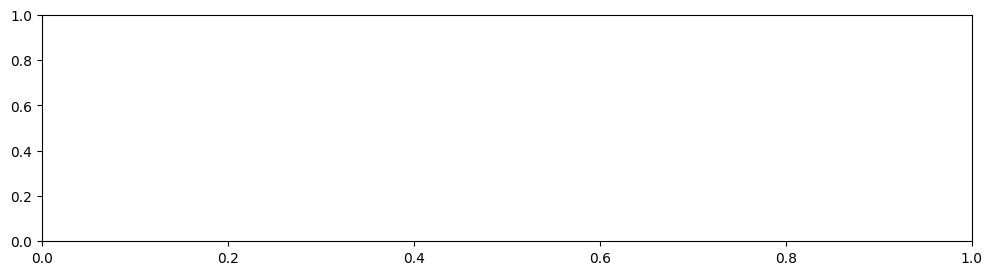

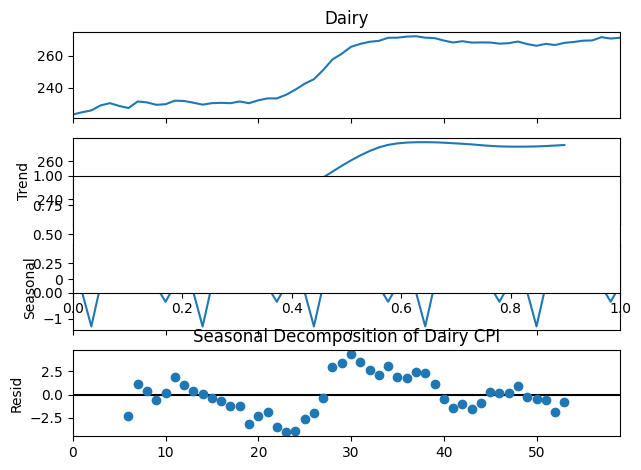

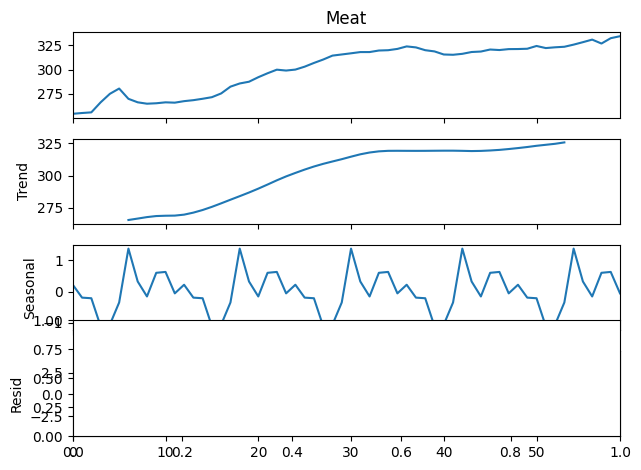

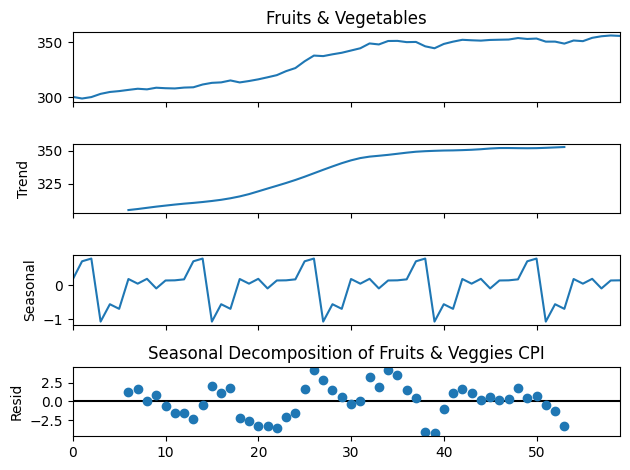

In [7]:
# Decompose the time series for each category
dairy_decomposition = seasonal_decompose(data['Dairy'], model='additive', period=12)
meat_decomposition = seasonal_decompose(data['Meat'], model='additive', period=12)
fruits_veggies_decomposition = seasonal_decompose(data['Fruits & Vegetables'], model='additive', period=12)

# Plotting the decompositions
plt.figure(figsize=(12, 10))

# Dairy
plt.subplot(3, 1, 1)
dairy_decomposition.plot()
plt.title('Seasonal Decomposition of Dairy CPI')
plt.savefig("dairy_seasonal_trends.png")

# Meat, Poultry, Fish, Eggs
plt.subplot(3, 1, 2)
meat_decomposition.plot()
plt.title('Seasonal Decomposition of Meat CPI')
plt.savefig("mpfe_seasonal_trends.png")

# Fruits and Veggies
plt.subplot(3, 1, 3)
fruits_veggies_decomposition.plot()
plt.title('Seasonal Decomposition of Fruits & Veggies CPI')
plt.savefig("fandv_seasonal_trends.png")

plt.tight_layout()
plt.show()


